In [25]:
#importamos las libreria que estaremos ocupando
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [26]:
#la variable data trae el archivo que se ocupara
data = pd.read_csv("C:/Users/ovsantiago/Desktop/py/datasets/train.csv")

In [27]:
#visualizamos que tipo de datos tenemos en nuestra data para poder entender mejor los datos y tomar mejores desiciones.
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


Lo que queremos saber es cuantos tipos de edades hay en nuestro dataset o conjunto de datos

In [28]:
#se muestra el conteo de los registros de las diferentes edades
data.Age.value_counts()

24    25960
23    24256
22    20964
25    20636
21    16457
      ...  
81       56
82       29
83       22
84       11
85       11
Name: Age, Length: 66, dtype: int64

In [29]:
#si queremos saber los rangos de edades que hay en los datos
#se crea una lista de los rangos que queremos
rangos = [0,10,20,30,40,50,60,70,80,90,100]

In [49]:
#como se puede observar nos muestra el conteo de los rangos de las edades que asignamos
data.groupby(pd.cut(data.Age,rangos)).Age.count()

Age
(0, 10]           0
(10, 20]       6232
(20, 30]     155229
(30, 40]      55163
(40, 50]      75941
(50, 60]      45305
(60, 70]      27838
(70, 80]      15272
(80, 90]        129
(90, 100]         0
Name: Age, dtype: int64

In [52]:
#si queremos mostrar el resultado anterior pero con porcentajes basta con aplicar la funcion lambda seria de esta manera:
a = (
    data.groupby(pd.cut(data.Age,rangos))
    .Age
    .count()
    .apply(lambda x: x/data.shape[0])
    
)

Medidas de tendencia central

<AxesSubplot:xlabel='Annual_Premium', ylabel='Age'>

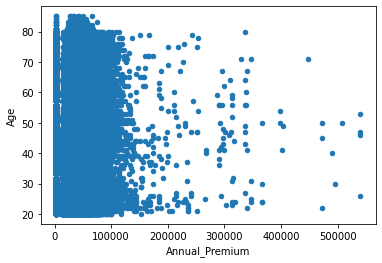

In [62]:
data.plot.scatter('Annual_Premium','Age')

In [63]:
data.Age.median()

36.0

In [64]:
data.Age.mode()

0    24
Name: Age, dtype: int64

Detección de valores atípicos.

In [66]:
data.Age.describe()

count    381109.000000
mean         38.822584
std          15.511611
min          20.000000
25%          25.000000
50%          36.000000
75%          49.000000
max          85.000000
Name: Age, dtype: float64

In [68]:
#para saber los cuartiles, podemos extraerlos individualmente de esta manera
q1 = data.Age.quantile(0.25)
q1

25.0

In [70]:
q3 = data.Age.quantile(0.75)
q3

49.0

In [73]:
#iqr o media
iqr = data.Age.quantile(0.50)
iqr

36.0

In [77]:
#Atípico inferior = Q1 – (1.5 * IQR)
lo = q1 - (1.5 * iqr)
lo


-29.0

In [78]:
#Outlier superior= Q3 + (1,5 * IQR) 
ho = q3 + (1.5 * iqr)
ho

103.0

<img src = "https://www.probabilidadyestadistica.net/wp-content/uploads/2022/03/valores-atipicos-outliers-e1646753412584-300x260.png">

<AxesSubplot:>

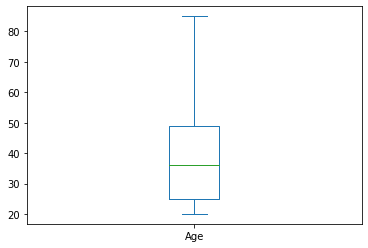

In [79]:
#En el siguiente grafico de cajas viene todo resumido todo lo anterior
data.Age.plot.box()

En estadística, la regla 68-95-99.7, también conocida como regla empírica, es una abreviatura utilizada para recordar el porcentaje de valores que se encuentran dentro de una banda alrededor de la media en una distribución normal con un ancho de dos, cuatro y seis veces la desviación típica.

In [81]:
#Medidas de variabilidad
#es la variacion maxima que hay en Age
data.Age.max()  - data.Age.min()

65

In [82]:
#si queremos una medida mas precisa dedispercion se puede
# recuperar con la variacion estandar

#desviacion estandar a nivel poblacion
data.Age.std(ddof=0)



15.511590667459156

In [83]:
#apliquemos la regla 68-95-99.7

#para saber que el 68% de los datos se encuentran ahi 
#restamos LA MEDIA DE LOS DATOS - desviacion estandar 

38-15

23

In [86]:
#se suma 

38+15
#esto quiere decir que el 68% de los datos se encuentran dentro de la edad de 53-23

53

In [87]:
#para el 95%
#el dos es de desviacion estandar (valor minimo)
38 - (2 * 15)

8

In [88]:
#para el 95%
#el dos es de desviacion estandar (valor maximo)
38 + (2 * 15)

68

In [89]:
#para el 99.7

38 - (3 * 15)

38 + (3 * 15)

83

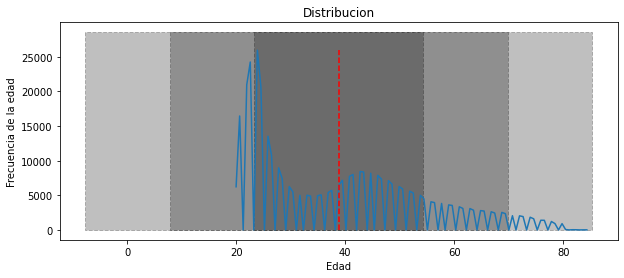

In [94]:
some_data = data.Age
H,edges = np.histogram(some_data,bins=100)

plt.figure(figsize = (10,4))
plt.title('Distribucion')
plt.plot(edges[:-1],H)
plt.plot([np.mean(some_data),np.mean(some_data)],[0,max(H)],linestyle = '--',color='r')
plt.fill_between([np.mean(some_data) - 3*np.std(some_data), np.mean(some_data)+ 3*np.std(some_data) ],
                [0,0],
                [1.1*max(H), 1.1*max(H)],linestyle="--",color='k',alpha=0.25)
plt.fill_between([np.mean(some_data) - 2*np.std(some_data), np.mean(some_data)+ 2*np.std(some_data) ],
                [0,0],
                [1.1*max(H), 1.1*max(H)],linestyle="--",color='k',alpha=0.25)
plt.fill_between([np.mean(some_data) - np.std(some_data), np.mean(some_data)+ np.std(some_data) ],
                [0,0],
                [1.1*max(H), 1.1*max(H)],linestyle="--",color='k',alpha=0.25)
plt.xlabel("Edad");plt.ylabel("Frecuencia de la edad")
plt.show()

Ejemplo tomado de Azulschool.net